<a href="https://colab.research.google.com/github/oumaima61/my-machine-learning-projects/blob/master/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

How Computers Perceive Images— Images as Data Points 

Grayscale Image 

The shape of the given image is:  (512, 512)


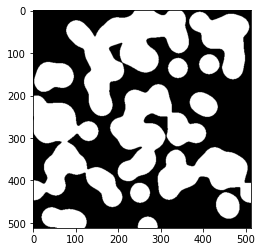

In [ ]:
from skimage import data
import numpy as np
import matplotlib.pyplot as plt
image = data.binary_blobs()
plt.imshow(image, cmap='gray')
print(f'The shape of the given image is: ',image.shape)

Colored Image 

The shape of the given image is:  (512, 512, 3)


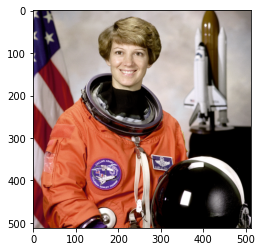

In [ ]:
color_image = data.astronaut()
plt.imshow(color_image)
# calculate shape
print(f'The shape of the given image is: ',color_image.shape)

Loading the Fashion-MNIST dataset in Keras

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers


In [ ]:
from keras.datasets import fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
np.random.seed(42)

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
#creating label names
label_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

data expolaration


In [ ]:
#Training Data
print(train_images.shape)
print(len(train_labels)) # Total no. of training images 

(60000, 28, 28)
60000


In [ ]:
#Testing Data
print(test_images.shape)
print(len(test_labels)) # Total no. of testing images 

(10000, 28, 28)
10000


In [ ]:
test_labels 

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

 Preprocessing the Data 

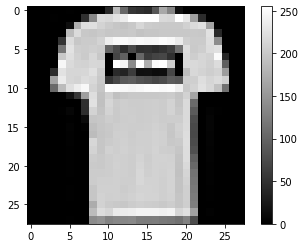

In [ ]:
plt.imshow(train_images[1],cmap='gray')
plt.grid(False)
plt.colorbar()
plt.show() 

In [ ]:
#Rescaling the test and train images

train_images = train_images / 255.0
test_images = test_images / 255.0 

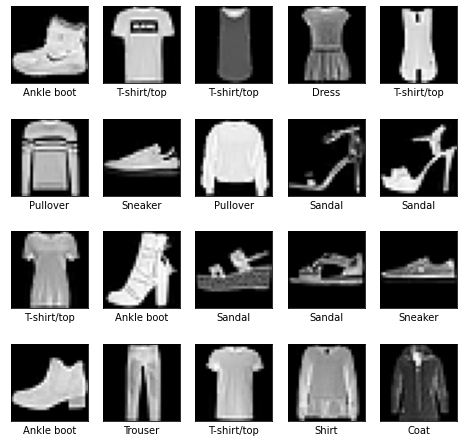

In [ ]:
plt.figure(figsize=(8,10))
for i in range(20):
    plt.subplot(5,5,i+1)
    plt.xticks([]) 
    plt.yticks([]) 
    plt.grid(False)
    plt.imshow(train_images[i], cmap='gray')   
    plt.xlabel(label_names[train_labels[i]]) 

In [ ]:
# Reshaping the test and train images

train_images = train_images.reshape(60000, 28, 28, 1)
test_images = test_images.reshape(10000, 28, 28, 1)

print(train_images.shape)
print(test_images.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


 Building the Network architecture

We will configure the layers of the model first and then proceed with compiling the model.
Layers

A layer is a core building block of a neural network. It acts as a kind of data processing module. Layers extract representations out of the input data that is fed into them. Inherently, deep learning consists of stacking up these layers to form a model. We already learned about the various layers used in a CNN in the section above.
Model

A model is a linear stack of layers. It is like a sieve for data processing made of a succession of increasing refined data filters called layers. The simplest model in Keras is sequential, which is built by stacking layers sequentially.

In [ ]:
model = keras.Sequential([
        keras.layers.Conv2D(32, (3,3), padding='same', activation='relu',
                           input_shape=(28, 28, 1)),
        keras.layers.MaxPooling2D((2, 2), strides=2),
        #Add another convolution
        keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
        keras.layers.MaxPooling2D((2, 2), strides=2),
        #Flatten the output. 
        keras.layers.Flatten(),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dense(10, activation='softmax')
]) 

In [ ]:
model.summary() 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               401536    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

Let's now look at how we defined the model architecture in detail
Convolution Layer

    We started with a convolutional layer, specifying the number of convolutions that we want to generate. Here we have chosen '32'.
    We have also specified the size of the convolutional matrix, in this case a 3X3 grid. We have also used padding to retain the size of the original image.
    We have used relu (rectified linear unit) as the activation function. A rectified linear unit has an output of 0 if the input is less than 0, and raw output otherwise. That is, if the input is greater than 0, the output is equal to the input. An activation function is the non-linear transformation that we do over the input signal. This transformed output is then sent to the next layer of neurons as input.
    Finally, we enter the shape of the input data.

Pooling Layer

Every convolution layer is then followed by a max-pooling layer. A max-pooling layer will downsample an image but will retain the features.
Flattened Layer

Finally, we will flatten the images into a one-dimensional vector.
Dense

This layer consists of a 128-neuron, followed by a 10-node softmax layer. Each node represents a class of clothing. The final layer takes input from the 128 nodes in the layer before it, and outputs a value in the range [0, 1], representing the probability that the image belongs to that class. The sum of all 10 node values is 1. We'll also include activation functions in the network to introduce non-linearity. Here we have used ReLU. The last layer is a 10-way softmax layer which will return an array of 10 probability scores. Each score will denote the probability that the current image belongs to one of the 10 given classes.


Compile the Model

After the model has been built, we enter the compilation phase, which primarily consists of three essential elements:

Loss Function: loss (Predicted — Actual value) is the quantity that we try to minimize during the training of a neural network.
  Optimizer: determines how the network will be updated based on the loss function. Optimizers could be the RMSProp optimizer, SGD with momentum, and so on.
Metrics: to measure the accuracy of the model. In this case, we will use accuracy.


In [ ]:
model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [ ]:
model.fit(train_images, train_labels, epochs=3,batch_size=32) 

Epoch 1/3
1875/1875 [==============================] - 74s 39ms/step - loss: 0.5376 - accuracy: 0.8054
Epoch 2/3
1875/1875 [==============================] - 73s 39ms/step - loss: 0.2663 - accuracy: 0.9024
Epoch 3/3
1875/1875 [==============================] - 73s 39ms/step - loss: 0.2182 - accuracy: 0.9195


Model Evaluation

In [ ]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print('Accuracy on test dataset:', test_accuracy) 

313/313 [==============================] - 4s 12ms/step - loss: 0.2442 - accuracy: 0.9110
Accuracy on test dataset: 0.9110000133514404


In [ ]:
predictions = model.predict(test_images) 

In [ ]:
predictions[10] 

array([1.8677447e-04, 5.9363454e-05, 2.6482653e-02, 4.8811537e-05,
       9.5277971e-01, 6.2008309e-07, 2.0432601e-02, 4.3751019e-08,
       2.6478976e-06, 6.9289254e-06], dtype=float32)

In [ ]:
np.argmax(predictions[10])

4

In [ ]:
test_labels[10]

4